# Building Neural Network from Scratch

Putting all the concepts we have learned so far, we will see how to build a neural network
from scratch. We will learn how the neural network learns to perform the XOR gate
operation. The XOR gate returns 1 only when exactly only one of its inputs is 1 else it returns 0 as shown in
the following figure:

![image](https://github.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/blob/master/Chapter01/images/1.png?raw=1)


To perform the XOR gate operation, we build a simple two-layer neural network as shown
in the following figure. As you can observe, we have an input layer with two nodes, a
hidden layer with five nodes and an output layers which consist of 1 node:


![image](https://github.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/blob/master/Chapter01/images/2.png?raw=1)


First, import the libraries:

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def dot_product_breakdown(matrix_a, matrix_b):
    # Check if matrices are compatible for dot product
    if matrix_a.shape[1] != matrix_b.shape[0]:
        print("Error: Incompatible matrices for dot product.")
        return

    # Calculate the dot product
    result = np.dot(matrix_a, matrix_b)

    # Print the detailed breakdown in the console
    print("Detailed Breakdown of Dot Product:")
    print("===================================")
    print(" Element   |   Calculation                    |   Result")
    print("------------|----------------------------------|------------------")

    # Iterate through each element in the resulting matrix
    for k in range(result.shape[1]):
      for i in range(result.shape[0]):
          calculation = " + ".join([f"({matrix_a[i, j]} * {matrix_b[j, k]})" for j in range(matrix_a.shape[1])])
          print(f" Result[{i + 1},1] |   {calculation}   |   {result[i, k]}")

    print("===================================")

Prepare the data as shown in the above XOR table:

In [50]:
#x = np.array([ [0], [1], [1],[0]])


x = np.array([ [0,1], [1,0], [1,1],[0,0]])
y = np.array([ [1], [1], [0], [0]])

Define the number of nodes in each layer:

In [51]:
num_input = x.shape[1]
num_hidden = 5
num_output = 1

Initialize weights and bias randomly. First, we initialize, input to hidden layer weights:

In [52]:
Wxh = np.random.randn(num_input,num_hidden)
bh = np.zeros((1,num_hidden))

In [53]:
Wxh

array([[ 0.47698019,  0.06131343, -0.26568184, -0.73944417,  0.85800641],
       [-1.14831535, -0.4199825 ,  0.3838867 , -0.77231229,  1.28261113]])

In [54]:
bh

array([[0., 0., 0., 0., 0.]])

Now initialize, hidden to output layer weights:

In [55]:
Why = np.random.randn (num_hidden,num_output)
by = np.zeros((1,num_output))

In [56]:
Why

array([[ 1.57367057],
       [-0.40358158],
       [-0.33152367],
       [ 0.32041292],
       [ 0.66108243]])

In [57]:
by

array([[0.]])

Define the sigmoid activation function:

In [58]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

Define the derivative of the sigmoid function:

In [59]:
def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

Define the forward propagation:

In [83]:
def forward_prop(x,Wxh,Why):
    z1 = np.dot(x,Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1,Why) + by
    y_hat = sigmoid(z2)
    return z1,a1,z2,y_hat

Define the backward propagation:

In [61]:
def backword_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(x.T, delta1)

    return dJ_dWxh, dJ_dWhy

Define the cost function:

In [62]:
def cost_function(y, y_hat):
    J = 0.5*sum((y-y_hat)**2)
    return J

Set the learning rate and number of training iterations:

In [63]:
alpha = 0.01
num_iterations = 1

#Detail Calculation


In [64]:
x

array([[0, 1],
       [1, 0],
       [1, 1],
       [0, 0]])

In [65]:
Wxh

array([[ 0.47698019,  0.06131343, -0.26568184, -0.73944417,  0.85800641],
       [-1.14831535, -0.4199825 ,  0.3838867 , -0.77231229,  1.28261113]])

In [66]:
z1 = np.dot(x,Wxh) + bh

In [67]:
z1

array([[-1.14831535, -0.4199825 ,  0.3838867 , -0.77231229,  1.28261113],
       [ 0.47698019,  0.06131343, -0.26568184, -0.73944417,  0.85800641],
       [-0.67133516, -0.35866907,  0.11820486, -1.51175647,  2.14061754],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

**Explaination of Z1**

  <h2>Detailed Breakdown of Dot Product</h2>

  <table>
    <tr>
      <th>Element</th>
      <th>Calculation</th>
      <th>Result</th>
    </tr>
    <!-- Row 1 -->
    <tr>
      <td>Result[1,1]</td>
      <td>(0 × 0.31863045) + (1 × -1.69249236)</td>
      <td>-1.69249236</td>
    </tr>
    <tr>
      <td>Result[1,2]</td>
      <td>(0 × 0.31685954) + (1 × -0.11440035)</td>
      <td>-0.11440035</td>
    </tr>
    <tr>
      <td>Result[1,3]</td>
      <td>(0 × -1.86606512) + (1 × 0.29770336)</td>
      <td>0.29770336</td>
    </tr>
    <tr>
      <td>Result[1,4]</td>
      <td>(0 × -0.5738244) + (1 × -0.19632642)</td>
      <td>-0.19632642</td>
    </tr>
    <tr>
      <td>Result[1,5]</td>
      <td>(0 × -1.48303203) + (1 × -0.11825849)</td>
      <td>-0.11825849</td>
    </tr>
    <!-- Row 2 -->
    <tr>
      <td>Result[2,1]</td>
      <td>(1 × 0.31863045) + (0 × -1.69249236)</td>
      <td>0.31863045</td>
    </tr>
    <tr>
      <td>Result[2,2]</td>
      <td>(1 × 0.31685954) + (0 × -0.11440035)</td>
      <td>0.31685954</td>
    </tr>
    <tr>
      <td>Result[2,3]</td>
      <td>(1 × -1.86606512) + (0 × 0.29770336)</td>
      <td>-1.86606512</td>
    </tr>
    <tr>
      <td>Result[2,4]</td>
      <td>(1 × -0.5738244) + (0 × -0.19632642)</td>
      <td>-0.5738244</td>
    </tr>
    <tr>
      <td>Result[2,5]</td>
      <td>(1 × -1.48303203) + (0 × -0.11825849)</td>
      <td>-1.48303203</td>
    </tr>
    <!-- Row 3 -->
    <tr>
      <td>Result[3,1]</td>
      <td>(1 × 0.31863045) + (1 × -1.69249236)</td>
      <td>-1.37386191</td>
    </tr>
    <tr>
      <td>Result[3,2]</td>
      <td>(1 × 0.31685954) + (1 × -0.11440035)</td>
      <td>0.20245919</td>
    </tr>
    <tr>
      <td>Result[3,3]</td>
      <td>(1 × -1.86606512) + (1 × 0.29770336)</td>
      <td>-1.56836176</td>
    </tr>
    <tr>
      <td>Result[3,4]</td>
      <td>(1 × -0.5738244) + (1 × -0.19632642)</td>
      <td>-0.77015082</td>
    </tr>
    <tr>
      <td>Result[3,5]</td>
      <td>(1 × -1.48303203) + (1 × -0.11825849)</td>
      <td>-1.60129052</td>
    </tr>
    <!-- Row 4 -->
    <tr>
      <td>Result[4,1]</td>
      <td>(0 × 0.31863045) + (0 × -1.69249236)</td>
      <td>0</td>
    </tr>
    <tr>
      <td>Result[4,2]</td>
      <td>(0 × 0.31685954) + (0 × -0.11440035)</td>
      <td>0</td>
    </tr>
    <tr>
      <td>Result[4,3]</td>
      <td>(0 × -1.86606512) + (0 × 0.29770336)</td>
      <td>0</td>
    </tr>
    <tr>
      <td>Result[4,4]</td>
      <td>(0 × -0.5738244) + (0 × -0.19632642)</td>
      <td>0</td>
    </tr>
    <tr>
      <td>Result[4,5]</td>
      <td>(0 × -1.48303203) + (0 × -0.11825849)</td>
      <td>0</td>
    </tr>
  </table>

In [68]:
dot_product_breakdown(x,Wxh)

Detailed Breakdown of Dot Product:
 Element   |   Calculation                    |   Result
------------|----------------------------------|------------------
 Result[1,1] |   (0 * 0.4769801852703905) + (1 * -1.1483153500508583)   |   -1.1483153500508583
 Result[2,1] |   (1 * 0.4769801852703905) + (0 * -1.1483153500508583)   |   0.4769801852703905
 Result[3,1] |   (1 * 0.4769801852703905) + (1 * -1.1483153500508583)   |   -0.6713351647804677
 Result[4,1] |   (0 * 0.4769801852703905) + (0 * -1.1483153500508583)   |   0.0
 Result[1,1] |   (0 * 0.06131343286157878) + (1 * -0.41998250213899924)   |   -0.41998250213899924
 Result[2,1] |   (1 * 0.06131343286157878) + (0 * -0.41998250213899924)   |   0.06131343286157878
 Result[3,1] |   (1 * 0.06131343286157878) + (1 * -0.41998250213899924)   |   -0.3586690692774205
 Result[4,1] |   (0 * 0.06131343286157878) + (0 * -0.41998250213899924)   |   0.0
 Result[1,1] |   (0 * -0.26568183705073) + (1 * 0.3838867009943851)   |   0.3838867009943851
 Res

In [69]:
def dot_product_breakdown(matrix_a, matrix_b):
    # Check if matrices are compatible for dot product
    if matrix_a.shape[1] != matrix_b.shape[0]:
        print("Error: Incompatible matrices for dot product.")
        return

    # Calculate the dot product
    result = np.dot(matrix_a, matrix_b)

    # Print the detailed breakdown in the console
    print("Detailed Breakdown of Dot Product:")
    print("===================================")
    print(" Element   |   Calculation                    |   Result")
    print("------------|----------------------------------|------------------")

    # Iterate through each element in the resulting matrix
    for k in range(result.shape[1]):
      for i in range(result.shape[0]):
          calculation = " + ".join([f"({matrix_a[i, j]} * {matrix_b[j, k]})" for j in range(matrix_a.shape[1])])
          print(f" Result[{i + 1},1] |   {calculation}   |   {result[i, k]}")

    print("===================================")

In [70]:
a1 = sigmoid(z1)

In [71]:
a1

array([[0.24079693, 0.39652094, 0.59481018, 0.31597912, 0.78289392],
       [0.61703454, 0.51532356, 0.4339675 , 0.3231257 , 0.70224397],
       [0.33819794, 0.41128178, 0.52951686, 0.18067863, 0.89478876],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ]])

In [72]:
Why

array([[ 1.57367057],
       [-0.40358158],
       [-0.33152367],
       [ 0.32041292],
       [ 0.66108243]])

In [73]:
z2 = np.dot(a1,Why) + by

In [74]:
z2

array([[0.64051404],
       [1.1869383 ],
       [0.84009992],
       [0.91003034]])

 <h2>Detailed Breakdown of Dot Product</h2>

  <table>
    <tr>
      <th>Element</th>
      <th>Calculation</th>
      <th>Result</th>
    </tr>
    <!-- Row 1 -->
    <tr>
      <td>Result[1,1]</td>
      <td>(0.15544835 * 0.72947875) + (0.47143106 * 0.23643936) + (0.57388099 * 0.35256838) + (0.45107544 * 1.01882628) + (0.47046979 * 1.82682994)</td>
      <td>Result[1,1] Result</td>
    </tr>
    <!-- Row 2 -->
    <tr>
      <td>Result[2,1]</td>
      <td>(0.57899045 * 0.72947875) + (0.57855871 * 0.23643936) + (0.13399768 * 0.35256838) + (0.36035483 * 1.01882628) + (0.18496989 * 1.82682994)</td>
      <td>Result[2,1] Result</td>
    </tr>
    <!-- Row 3 -->
    <tr>
      <td>Result[3,1]</td>
      <td>(0.20199661 * 0.72947875) + (0.55044261 * 0.23643936) + (0.17245006 * 0.35256838) + (0.31644648 * 1.01882628) + (0.16780133 * 1.82682994)</td>
      <td>Result[3,1] Result</td>
    </tr>
    <!-- Row 4 -->
    <tr>
      <td>Result[4,1]</td>
      <td>(0.5 * 0.72947875) + (0.5 * 0.23643936) + (0.5 * 0.35256838) + (0.5 * 1.01882628) + (0.5 * 1.82682994)</td>
      <td>Result[4,1] Result</td>
    </tr>
  </table>

In [75]:
 y_hat = sigmoid(z2)

In [76]:
y_hat

array([[0.65486965],
       [0.76619303],
       [0.69848626],
       [0.71300637]])

In [77]:
delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
dJ_dWhy = np.dot(a1.T, delta2)
delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
dJ_dWxh = np.dot(x.T, delta1)

In [78]:
dJ_dWxh

array([[ 0.03623736, -0.0101528 , -0.0087387 ,  0.00404217,  0.00336534],
       [ 0.02937156, -0.00684155, -0.00591693,  0.00157535,  0.00039006]])

In [79]:
dJ_dWhy

array([[0.07807324],
       [0.08093702],
       [0.08626986],
       [0.06134725],
       [0.11409456]])

Now let's start training the network:

In [80]:
cost = []
for i in range(num_iterations):

    #perform forward propagation and predict output
    z1,a1,z2,y_hat = forward_prop(x,Wxh,Why)
    print("Iteration: ", i,"----------------------------------------------------------------------------------------------------------")

    print("#perform forward propagation and predict output: ")
    print("z1 = ",z1)
    print("a1 = ",a1)
    print("z2 = ",z2)
    print("y_hat = ",y_hat)

    #perform backward propagation and calculate gradients
    dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)
    print("#perform backward propagation and calculate gradients: ")
    print("dJ_dWxh = ",dJ_dWxh)
    print("dJ_dWhy = ",dJ_dWhy)


    #update the weights
    Wxh = Wxh -alpha * dJ_dWxh
    Why = Why -alpha * dJ_dWhy

    print("#update the weights: ")
    print("Wxh = ",Wxh)
    print("Why = ",Why)

    #compute cost
    c = cost_function(y, y_hat)
    print("#compute cost: ")
    print("cost = ",c)

    #store the cost
    cost.append(c)

Iteration:  0 ----------------------------------------------------------------------------------------------------------
#perform forward propagation and predict output: 
z1 =  [[-1.14831535 -0.4199825   0.3838867  -0.77231229  1.28261113]
 [ 0.47698019  0.06131343 -0.26568184 -0.73944417  0.85800641]
 [-0.67133516 -0.35866907  0.11820486 -1.51175647  2.14061754]
 [ 0.          0.          0.          0.          0.        ]]
a1 =  [[0.24079693 0.39652094 0.59481018 0.31597912 0.78289392]
 [0.61703454 0.51532356 0.4339675  0.3231257  0.70224397]
 [0.33819794 0.41128178 0.52951686 0.18067863 0.89478876]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 =  [[0.64051404]
 [1.1869383 ]
 [0.84009992]
 [0.91003034]]
y_hat =  [[0.65486965]
 [0.76619303]
 [0.69848626]
 [0.71300637]]
#perform backward propagation and calculate gradients: 
dJ_dWxh =  [[ 0.03623736 -0.0101528  -0.0087387   0.00404217  0.00336534]
 [ 0.02937156 -0.00684155 -0.00591693  0.00157535  0.00039006]]
dJ_dWhy 

In [81]:
z1.shape

(4, 5)

Plot the cost function:

Text(0, 0.5, 'Cost')

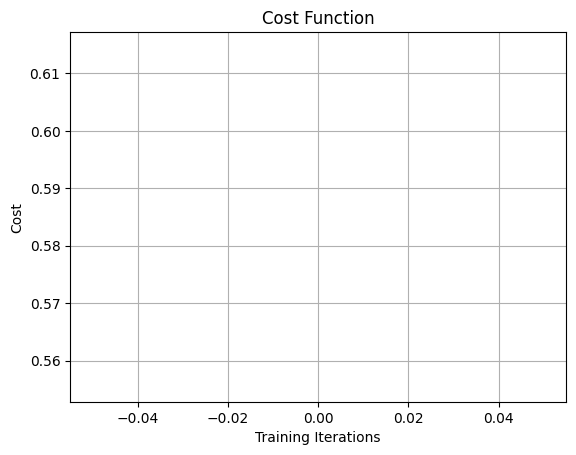

In [82]:
plt.grid()
plt.plot(range(num_iterations),cost)

plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

As you can notice, the loss decreases over the training iterations.


Thus, we have learned how to build a neural network from scratch in the next chapter we will one of the popularly used deep learning libraries called TensorFlow.